## 머신러닝 실습
### 텍스트 마이닝
> 1. 데이터 수집

#### 네이버 코로나 뉴스로 감성분석

In [1]:
# 필요 라이브러리 등록
import json

In [2]:
with open('./data/코로나_naver_news.json', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
# 추가 라이브러리 등록
import pandas as pd
import re

In [4]:
dfData = pd.DataFrame(data)

In [5]:
dfData.head(10)

,cnt,description,pDate,title
0,1,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",2020-06-04 14:12:00,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;
1,2,▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,2020-06-04 14:12:00,"창녕군, ‘창녕형’비대면 선별진료소 운영"
2,3,"한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",2020-06-04 14:12:00,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정"
3,4,변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,2020-06-04 14:12:00,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]
4,5,이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,2020-06-04 14:12:00,"이재갑 장관, 고용안정지원금 서울센터 방문"
5,6,하지만 올해 신종 <b>코로나</b>바이러스 감염증(<b>코로나</b>19) 여파로...,2020-06-04 14:12:00,"'부산행'→'반도'로 이어지는 한국형 좀비 세계관, 칸의 선택 받았다"
6,7,경찰은 <b>코로나</b>19 감염이 우려된다며 8명 이상을 모이는 집회를 봉쇄해왔...,2020-06-04 14:12:00,"31년만 첫 '불허'에도 홍콩, 톈안문 추모 촛불"
7,8,전국 컨테이너 처리량 243만TEU…2.5%↓ 국내 항만은 4월 들어 신종 <b>코...,2020-06-04 14:12:00,국내 3대 항만 4월 물동량 ‘인천항만 상승곡선’
8,9,"한편, '<b>코로나</b>19'로 인한 해외의 식재료 사재기에서 보듯이 국민들의 ...",2020-06-04 14:12:00,"경기도의회 농정해양위, 농민기본소득 도입 이재명 지사와 집행부에 강력 촉구"
9,10,이용빈 의원실 제공 이용빈 민주당 원내부대표가 4일 &quot;<b>코로나</b> ...,2020-06-04 14:12:00,이용빈 원내부대표 &quot;<b>코로나</b> 대응 의료진·노동자 건강권 보장해야...


In [6]:
# 한글 이외의 것을 다 제거, title,description 컬럼만
dfData['title'] = dfData['title'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))
dfData['description'] = dfData['description'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [7]:
# 엑셀로 저장(필요한 컬럼만 따로 저장)
dfData[['title', 'pDate', 'description']].to_excel('./data/코로나뉴스_전처리.xlsx', index=False)

In [8]:
# 전처리 완료한 파일을 다시 읽어오기
dfData = pd.read_excel('./data/코로나뉴스_전처리.xlsx')

In [9]:
dfData.tail()

,title,pDate,description
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,2020-06-04 13:36:00,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...
796,중부발전 소규모 태양광사업자 판매대금 선 지급,2020-06-04 13:36:00,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,2020-06-04 13:36:00,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,2020-06-04 13:36:00,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...
799,포토|대종상영화제 문가영 발랄 듬 뿍,2020-06-04 13:36:00,제 회 대종상영화제 참석한 문가영제 회 대종상영화제 참석한 문가영 코로나 여파로 무...


#### 감성분석 모델 재구축

In [10]:
# 훈련용 데이터 가져오기
dfNsmcTrain = pd.read_csv('../day12/data/ratings_train.txt', engine='python', sep='\t', encoding='utf-8')

In [11]:
dfNsmcTrain.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [12]:
dfNsmcTrain = dfNsmcTrain[dfNsmcTrain['document'].notnull()]

In [13]:
dfNsmcTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [14]:
# 불필요한 글자들 제거
dfNsmcTrain['document'] = dfNsmcTrain['document'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [15]:
dfNsmcTrain.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [16]:
# 빈 row 제거
dfNsmcTrain = dfNsmcTrain[dfNsmcTrain['document'] != ' ']

In [17]:
# 벡터화 라이브러리 등록
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

# 로지스틱회귀 라이브러리 등록
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
okt = Okt()

In [19]:
def oktToken(text):
    tokens = okt.morphs(text)
    return tokens

In [20]:
# 벡터화 객체 생성
tfidf = TfidfVectorizer(tokenizer=oktToken, ngram_range=(1, 2), min_df=3, max_df=0.9)

In [21]:
tfidf.fit(dfNsmcTrain['document'])
nsmc_train_tfidf = tfidf.transform(dfNsmcTrain['document'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
# 로지스틱회귀 모델 생성
model = LogisticRegression(random_state=0, C=3.5)

In [23]:
model.get_params()

{'C': 3.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
model.fit(nsmc_train_tfidf, dfNsmcTrain['label'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3.5, random_state=0)

#### 네이버 뉴스 타이틀로 감성 분석

In [25]:
# 분석할 데이터의 벡터화
data_title_tfidf = tfidf.transform(dfData['title'])

In [26]:
# 감성 분석(로지스틱회귀)
title_predict = model.predict(data_title_tfidf)

In [27]:
# 감성분석 결과를 DataFrame으로 저장
dfData['title_label'] = title_predict

In [28]:
dfData.head()

,title,pDate,description,title_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,1
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,1


In [29]:
# 설명(description)도 동일하게 감성분석
data_desc_tfidf = tfidf.transform(dfData['description'])

In [30]:
desc_predict = model.predict(data_desc_tfidf)

In [31]:
dfData['desc_label'] = desc_predict

In [32]:
dfData.head()

,title,pDate,description,title_label,desc_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0,0
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,1,0
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0,1
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,1,0


In [33]:
# 엑셀파일로 저장
dfData.to_excel('./data/코로나뉴스_감성분석_결과.xlsx', index=False)

#### 시각화 준비

In [34]:
# 최종데이터 로드
dfResult = pd.read_excel('./data/코로나뉴스_감성분석_결과.xlsx')

In [35]:
dfResult.tail()

,title,pDate,description,title_label,desc_label
795,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,2020-06-04 13:36:00,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...,0,0
796,중부발전 소규모 태양광사업자 판매대금 선 지급,2020-06-04 13:36:00,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...,1,1
797,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,2020-06-04 13:36:00,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...,1,1
798,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,2020-06-04 13:36:00,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...,0,1
799,포토|대종상영화제 문가영 발랄 듬 뿍,2020-06-04 13:36:00,제 회 대종상영화제 참석한 문가영제 회 대종상영화제 참석한 문가영 코로나 여파로 무...,0,0


In [36]:
dfResult['title_label'].value_counts()

title_label
0    479
1    321
Name: count, dtype: int64

In [37]:
dfResult['desc_label'].value_counts()

desc_label
0    447
1    353
Name: count, dtype: int64

In [38]:
# 긍정적결과와 부정적결과를 분리
column_names = dfResult.columns.tolist()

In [39]:
column_names.remove('pDate')

In [40]:
column_names

['title', 'description', 'title_label', 'desc_label']

In [41]:
dfData.head()

,title,pDate,description,title_label,desc_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,2020-06-04 14:12:00,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,2020-06-04 14:12:00,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0,0
2,모바일 메인 홍보 모델로 설현 선정,2020-06-04 14:12:00,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,1,0
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,2020-06-04 14:12:00,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0,1
4,이재갑 장관 고용안정지원금 서울센터 방문,2020-06-04 14:12:00,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,1,0


In [42]:
# 빈 DataFrame 생성
dfPositiveData = pd.DataFrame(columns=column_names)
dfnegativeData = pd.DataFrame(columns=column_names)

# desc_label 이 긍정인지 부정인지에 따라 dfPositiveData 와 dfNegativeData에 나눠서 할당
for i, data in dfData.iterrows():
    title = data['title']
    description = data['description']
    title_label = data['title_label']
    desc_label = data['desc_label']

    if desc_label == 1:  # 긍정
        dfTemp = pd.DataFrame([[title, description, title_label, desc_label]], columns=dfPositiveData.columns)
        dfPositiveData = pd.concat([dfPositiveData, dfTemp])
    else:  # 부정
        dfTemp = pd.DataFrame([[title, description, title_label, desc_label]], columns=dfnegativeData.columns)
        dfnegativeData = pd.concat([dfnegativeData, dfTemp])

In [43]:
len(dfPositiveData)

353

In [44]:
len(dfnegativeData)

447

#### 시각화

In [45]:
# 긍정 데이터에서 단어 추출
posDescriptions = dfPositiveData['description']

In [46]:
posDescriptionWords = []

for d in posDescriptions:
    posDescriptionWords.append(okt.nouns(d))  # 명사 형태소만 추출

In [47]:
len(posDescriptionWords)

353

In [48]:
finalPosDescWords = []

for d in posDescriptionWords:
    d2 = [w for w in d if len(w) > 1]  # 글자길이가 1보다 큰 것만 추출
    finalPosDescWords.append(' '.join(d2))

In [49]:
# TF-IDF 기반 단어별 출현빈도 계산
posTfidf = TfidfVectorizer(tokenizer=oktToken, min_df=2)

In [50]:
posDtm = posTfidf.fit_transform(finalPosDescWords)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [51]:
posVocas = dict()

for i, word in enumerate(posTfidf.get_feature_names_out()):
    posVocas[word] = posDtm.getcol(i).sum()  # 해당 단어의 빈도수

In [52]:
posWords = sorted(posVocas.items(), key=(lambda x: x[1]), reverse=True)

In [53]:
# 추가 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
sns.set_style('darkgrid')

In [55]:
# 한글 깨짐 문제 해결
from matplotlib import rc

rc('font', family='D2Coding')

plt.rcParams['axes.unicode_minus'] = False

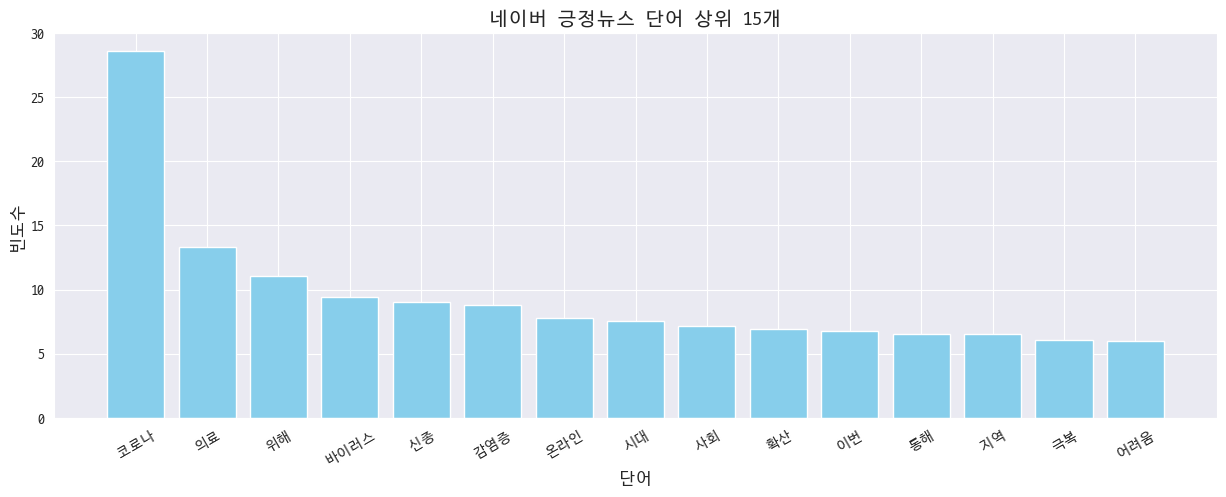

In [56]:
max = 15
plt.figure(figsize=(15, 5))
plt.bar(range(max), [i[1] for i in posWords[:max]], color='skyblue')
plt.title('네이버 긍정뉴스 단어 상위 15개', fontsize=14)
plt.xlabel('단어', fontsize=12)
plt.ylabel('빈도수', fontsize=12)

# x축 단어 표시
plt.xticks(range(max), [i[0] for i in posWords[:max]], rotation=30)

plt.show()